In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

### RQ1

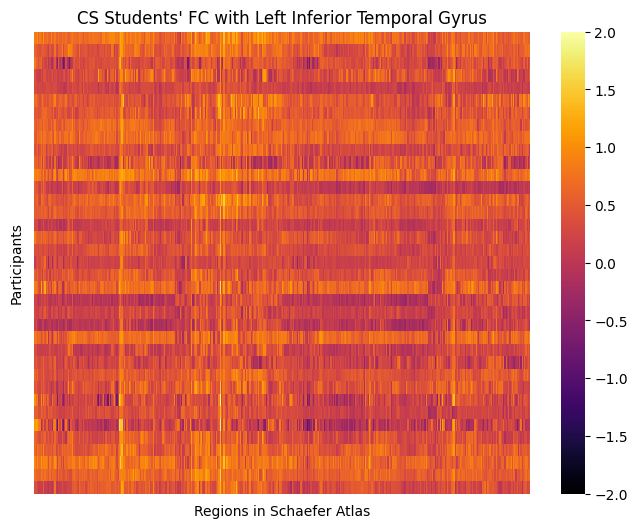

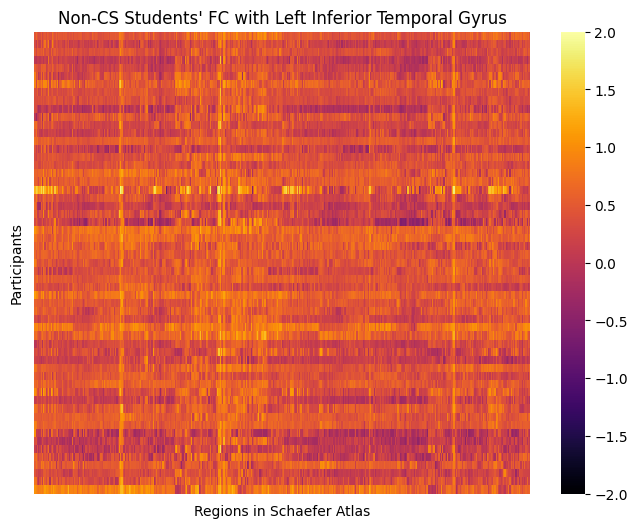

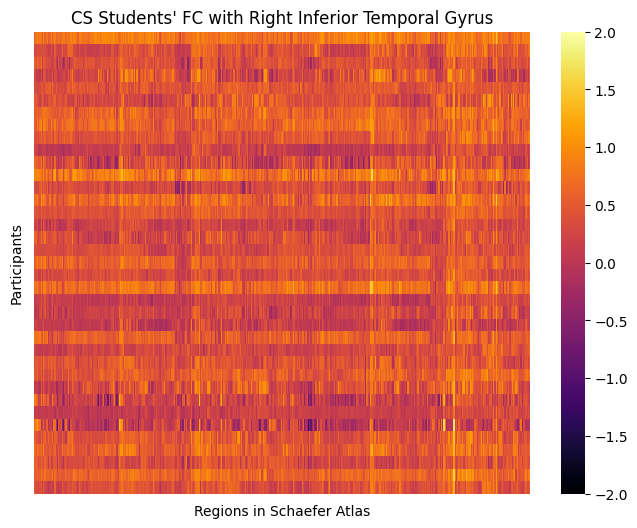

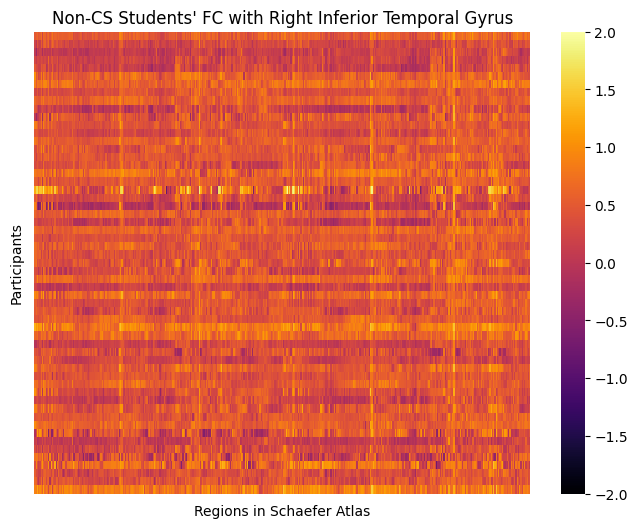

In [25]:
# Correlation Matrices
sig_seeds = ['133','339']
hemi = ['Left', 'Right']

for i,seed in enumerate(sig_seeds):
    rev_filename = f"/home/zachkaras/fmri/midprocessing/rev_correlationz_seed{seed}.csv"
    non_filename = f"/home/zachkaras/fmri/midprocessing/non_correlationz_seed{seed}.csv"
    rev_df = pd.read_csv(rev_filename, header=None)
    non_df = pd.read_csv(non_filename, header=None)
    # rev = df.iloc[0:37,:]
    # non = df.iloc[37:,:]
    plt.figure(figsize=(8,6))
    # sns.color_palette("BuGn", as_cmap=True)
    ax = sns.heatmap(rev_df, cmap="inferno", vmin=-2, vmax=2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # plt.show
    plt.xlabel('Regions in Schaefer Atlas')
    plt.ylabel("Participants")
    plt.title(f"CS Students' FC with {hemi[i]} Inferior Temporal Gyrus")
    plt.savefig(f"../results/heatmap_rev_seed{seed}.png", dpi=200)
    
    plt.figure(figsize=(8,6))
    # sns.color_palette("BuGn", as_cmap=True)
    ax = sns.heatmap(non_df, cmap="inferno", vmin=-2, vmax=2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    # plt.show
    plt.xlabel('Regions in Schaefer Atlas')
    plt.ylabel("Participants")
    plt.title(f"Non-CS Students' FC with {hemi[i]} Inferior Temporal Gyrus")
    plt.savefig(f"../results/heatmap_non_seed{seed}.png", dpi=200)
    # plt.figure
    # sns.heatmap(non, cmap="inferno")
    # plt.show
    
    # plt.imshow(rev)
    # plt.imshow(non)

Text(0.5, 1.0, 'Non-CS Students Functional Connectivity')

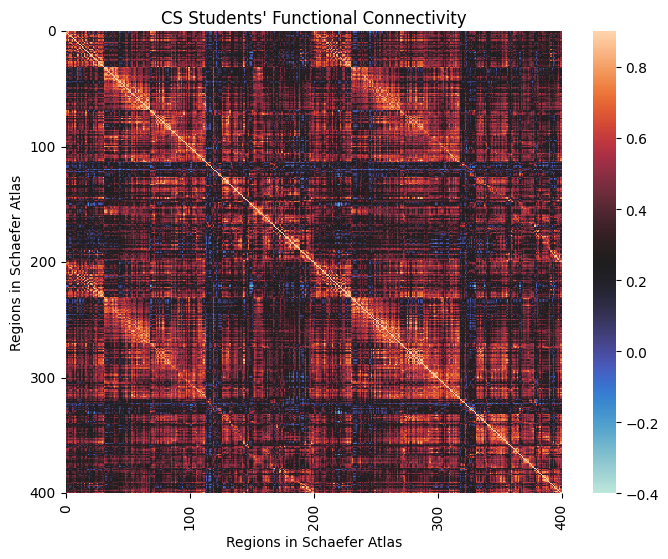

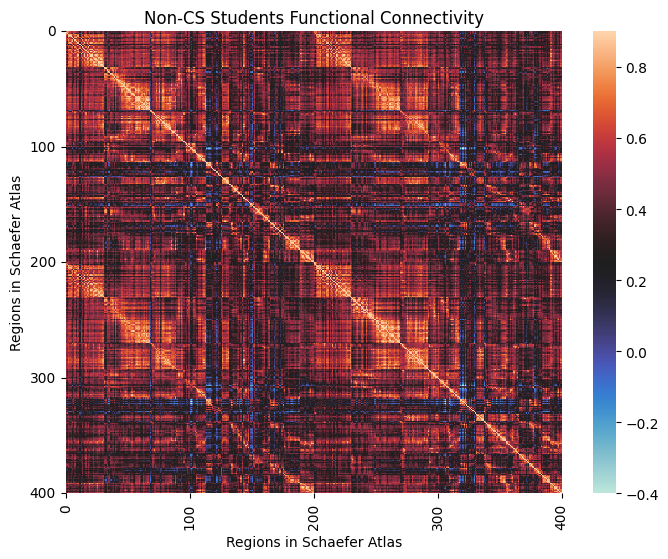

In [11]:
rev_filename = f"/home/zachkaras/fmri/midprocessing/corr_rev_z.csv"
non_filename = f"/home/zachkaras/fmri/midprocessing/corr_non_z.csv"
rev_df = pd.read_csv(rev_filename, header=None)
non_df = pd.read_csv(non_filename, header=None)
# rev = df.iloc[0:37,:]
# non = df.iloc[37:,:]
plt.figure(figsize=(8,6))
# sns.color_palette("BuGn", as_cmap=True)
ax = sns.heatmap(rev_df, cmap="icefire", vmin=-0.4, vmax=0.9)
ax.set_xticks(range(0,401,100))
ax.set_yticks(range(0,401,100))
ax.set_xticklabels(range(0,401,100))
ax.set_yticklabels(range(0,401,100))
# plt.show
plt.xlabel('Regions in Schaefer Atlas')
plt.ylabel("Regions in Schaefer Atlas")
plt.title(f"CS Students' Functional Connectivity")
# plt.savefig(f"../results/heatmap_rev.png", dpi=200)

plt.figure(figsize=(8,6))
# sns.color_palette("BuGn", as_cmap=True)
ax = sns.heatmap(non_df, cmap="icefire", vmin=-0.4, vmax=0.9) # mako
ax.set_xticks(range(0,401,100))
ax.set_yticks(range(0,401,100))
ax.set_xticklabels(range(0,401,100))
ax.set_yticklabels(range(0,401,100))
# plt.show
plt.xlabel('Regions in Schaefer Atlas')
plt.ylabel("Regions in Schaefer Atlas")
plt.title(f"Non-CS Students Functional Connectivity")
# plt.savefig(f"../results/heatmap_non.png", dpi=200)

Text(0.5, 1.0, 'Non-CS Students Functional Connectivity')

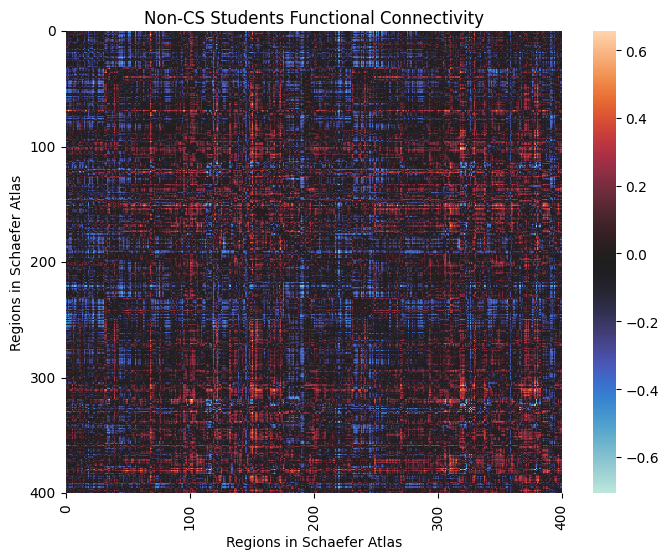

In [12]:
diff = rev_df - non_df
plt.figure(figsize=(8,6))
# sns.color_palette("BuGn", as_cmap=True)
ax = sns.heatmap(diff, cmap="icefire") # mako , v, vmin=-0.9, vmax=0.9
ax.set_xticks(range(0,401,100))
ax.set_yticks(range(0,401,100))
ax.set_xticklabels(range(0,401,100))
ax.set_yticklabels(range(0,401,100))
# plt.show
plt.xlabel('Regions in Schaefer Atlas')
plt.ylabel("Regions in Schaefer Atlas")
plt.title(f"Non-CS Students Functional Connectivity")

### RQ2

In [2]:
# Linear Regression
yrs_experience = [2,4,2,2,3,4,4,5,3,1,2,4,3,2,2,5,10,8,6,3,4,2,5,4,10,4,4,4,10,7,12,8,12,4,4,3,4,3,4,
                  2.5,3,2,2,3,1.5,3,2,2,2,2,3,2,2.5,2,2,1,1,5,1];
age = [21,21,19,21,20,21,22,22,19,18,20,21,21,18,21,22,26,22,26,21,22,24,24,27,27,21,22,22,23,23,25,23,
       24,24,21,21,22,23,22,21,21,20,22,21,20,19,19,22,20,19,23,20,20,19,20,19,20,25,25];
X = sm.add_constant(list(zip(yrs_experience,age)));
df = pd.read_csv("../midprocessing/correlationz_seed9.csv", header=None)

y = df.iloc[:,39]
# print(y)
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                     39   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     5.028
Date:                Wed, 20 Mar 2024   Prob (F-statistic):            0.00981
Time:                        23:36:52   Log-Likelihood:                 5.2042
No. Observations:                  59   AIC:                            -4.408
Df Residuals:                      56   BIC:                             1.824
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3056      0.358      0.853      0.3

-0.040883988152556776 0.011007730473102365 0.30556633780601616


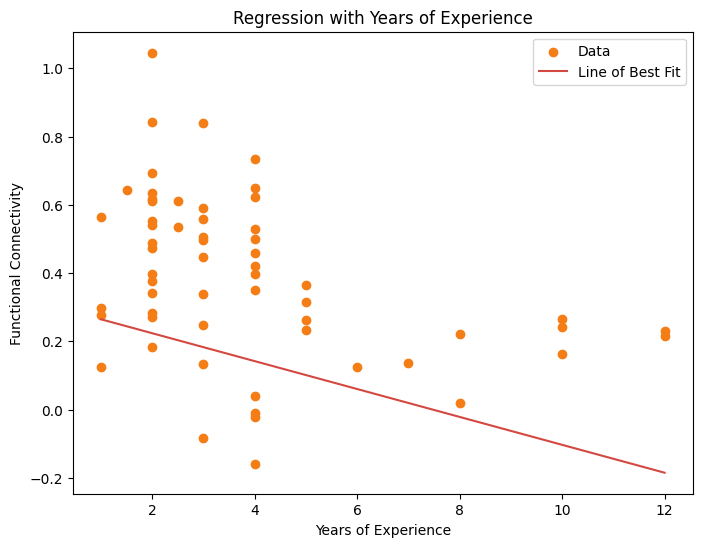

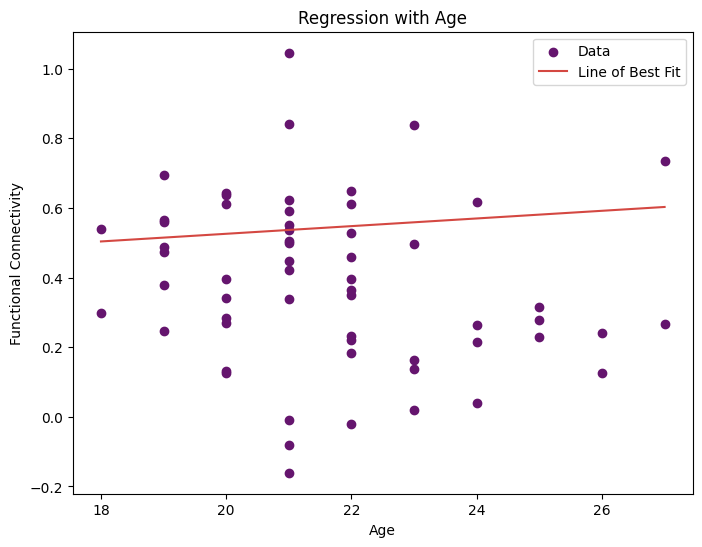

In [3]:
intercept, beta1, beta2 = model.params
print(beta1, beta2, intercept)
X1_x = np.linspace(min(yrs_experience), max(yrs_experience), 100)
X2_x = np.linspace(min(age), max(age), 100)
y_pred_X1 = intercept + beta1 * X1_x
y_pred_X2 = intercept + beta2 * X2_x


plt.figure(figsize=(8, 6))
# plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(yrs_experience, y, label='Data', color="#f47d15")
plt.plot(X1_x, y_pred_X1, color='#d44842', label='Line of Best Fit')
plt.xlabel('Years of Experience')
plt.ylabel('Functional Connectivity')
plt.title('Regression with Years of Experience')
plt.legend()
# plt.savefig("../results/LinearRegression_YrsExperience.png", dpi=200)

# Plot for X2
# plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.figure(figsize=(8,6))
plt.scatter(age, y, label='Data', color="#65156e")
plt.plot(X2_x, y_pred_X2, color='#d44842', label='Line of Best Fit')
plt.xlabel('Age')
plt.ylabel('Functional Connectivity')
plt.title('Regression with Age')
plt.legend()
# plt.savefig("../results/LinearRegression_Age.png", dpi=200)